In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_recall_curve,
    average_precision_score,
    confusion_matrix,
    roc_curve,
    auc,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [8]:
data = pd.read_csv("D:\\Programing World\\ML Lab Datasets\\Dataset for lab 5\\spam.csv", encoding="latin-1")[['v1', 'v2']]
data.columns = ['label', 'message']
data['label'] = data['label'].map({'ham': 0, 'spam': 1})


In [9]:
X = data['message']
y = data['label']

In [11]:
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [14]:
y_scores = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)


In [15]:
print("\n--- Model Evaluation Metrics ---")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))



--- Model Evaluation Metrics ---
Accuracy : 0.97847533632287
Precision: 1.0
Recall   : 0.84
F1-Score : 0.9130434782608695


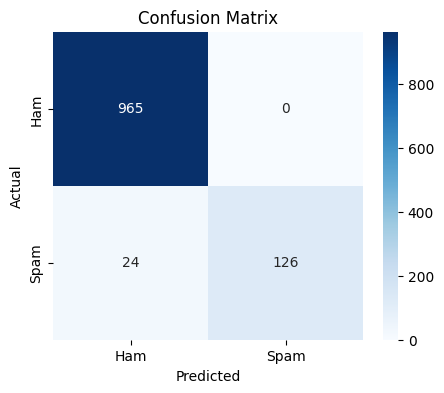

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

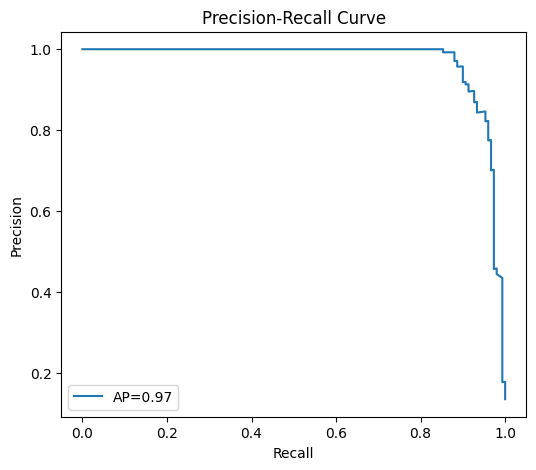

In [17]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'AP={avg_precision:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

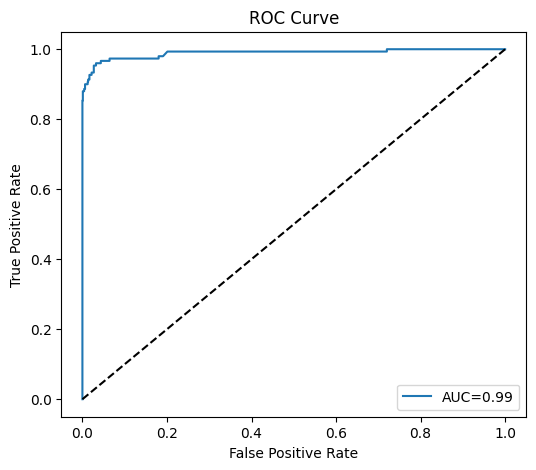

In [18]:
# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC={roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [19]:
results = pd.DataFrame({
    "Message": X.iloc[y_test.index],
    "Actual": y_test.map({0: "Ham", 1: "Spam"}),
    "Predicted": pd.Series(y_pred, index=y_test.index).map({0: "Ham", 1: "Spam"})
})
print("\n--- Sample Predictions ---")
print(results.head(7))



--- Sample Predictions ---
                                                Message Actual Predicted
3245  Funny fact Nobody teaches volcanoes 2 erupt, t...    Ham       Ham
944   I sent my scores to sophas and i had to do sec...    Ham       Ham
1044  We know someone who you know that fancies you....   Spam       Ham
2484  Only if you promise your getting out as SOON a...    Ham       Ham
812   Congratulations ur awarded either å£500 of CD ...   Spam      Spam
2973         I'll text carlos and let you know, hang on    Ham       Ham
2991          K.i did't see you.:)k:)where are you now?    Ham       Ham


In [20]:
print("\n--- Check Your Own Message ---")
user_msg = input("Enter a message: ")
user_vec = vectorizer.transform([user_msg])
prediction = model.predict(user_vec)[0]
print("Prediction:", "Spam" if prediction == 1 else "Ham")


--- Check Your Own Message ---
Prediction: Ham
